In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor


In [2]:
CSV_FILE_PATH = '../Datasets/new_df_with_colors.csv'
CSV_FILE_PATH_VAL = '../Datasets/new_df_with_colors_val.csv'
# load the training dataset
lesion = pd.read_csv(CSV_FILE_PATH, usecols=lambda x: 'Unnamed' not in x)
lesion_val = pd.read_csv(CSV_FILE_PATH_VAL, usecols=lambda x: 'Unnamed' not in x)

# Display a random sample of 10 observations
sample = lesion.sample(10)

print(f"Shape of data: {sample.shape}")
sample


Shape of data: (10, 109)


,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape2D_PerimeterSurfaceRatio,original_shape2D_PixelSurface,original_shape2D_Sphericity,mean_b,mean_g,mean_r,std_b,std_g,std_r,categories
3392,185.0,232.0,3.001013e+08,1.706683,22.0,5.050454,247.0,212.709246,14.893791,217.0,...,0.051625,6576.0,0.846792,1.054370,2.864963,2.608859,7.351636,18.484328,17.238857,2.0
1854,168.0,218.0,4.496302e+09,1.767495,24.0,4.050587,244.0,194.493260,15.249050,197.0,...,0.012706,117650.0,0.813380,26.800993,48.923578,52.344067,33.167450,58.911664,64.019203,3.0
3221,146.0,165.0,2.276412e+09,0.826825,10.0,4.536338,203.0,155.935033,6.289614,157.0,...,0.015114,93370.0,0.767566,35.171352,48.096726,44.553493,48.386038,66.258145,62.772029,4.0
1024,104.0,184.0,2.070112e+09,2.231567,45.0,2.239310,241.0,141.055586,24.592340,141.0,...,0.012056,99719.0,0.931165,42.452378,56.314319,51.849415,58.276128,75.310225,69.874048,2.0
859,140.0,194.0,1.354430e+09,1.739566,35.0,1.936050,214.0,166.185619,17.614028,166.0,...,0.018453,48314.0,0.873977,16.071452,27.272615,27.901019,35.491398,59.706937,61.982756,0.0
3739,198.0,234.0,3.159259e+09,1.553948,18.0,7.589768,255.0,217.842172,11.824426,220.0,...,0.015219,66205.0,0.905269,9.356441,31.547856,29.851563,18.282304,56.960895,54.453030,2.0
2018,160.0,200.0,1.816482e+09,1.488049,21.0,5.808230,221.0,183.359700,13.298823,189.0,...,0.017044,53553.0,0.898742,14.407800,26.615207,23.311726,29.970266,55.363450,49.314384,0.0
4102,214.0,239.0,3.239252e+09,1.053511,13.0,4.786195,255.0,227.327205,8.039922,229.0,...,0.016182,62548.0,0.875931,6.642319,26.344752,24.035007,13.113106,49.080943,45.210099,5.0
2497,76.0,209.0,2.926012e+09,2.914605,80.0,2.139713,255.0,148.248687,41.892331,155.0,...,0.012091,119785.0,0.847146,47.803670,72.288437,78.472411,62.868459,84.864729,90.399839,1.0
482,146.0,204.0,1.529209e+09,1.939328,40.0,1.723063,241.0,177.045611,19.589503,181.0,...,0.017970,48037.0,0.900040,14.047156,25.939141,25.347515,31.602754,56.755968,55.426344,5.0


In [3]:
lesion_classes = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

lesion_selected = lesion.loc[:, [
'original_glcm_MaximumProbability',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LowGrayLevelRunEmphasis',
       'original_glszm_LargeAreaEmphasis',
       'original_glszm_LargeAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_shape2D_Sphericity',
       'original_firstorder_90Percentile_r',
       'original_firstorder_Kurtosis_r', 'original_firstorder_Skewness_r',
       'original_glcm_ClusterShade_r', 'original_glcm_MCC_r',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis_r',
       'original_gldm_SmallDependenceEmphasis_r',
       'original_glrlm_LongRunEmphasis_r',
       'original_glrlm_LongRunLowGrayLevelEmphasis_r',
       'original_glrlm_ShortRunEmphasis_r',
       'original_glrlm_ShortRunLowGrayLevelEmphasis_r',
       'original_glszm_LargeAreaHighGrayLevelEmphasis_r',
       'original_glszm_LargeAreaLowGrayLevelEmphasis_r',
       'original_glszm_SizeZoneNonUniformity_r',
       'original_glszm_SmallAreaEmphasis_r',
       'original_glszm_SmallAreaLowGrayLevelEmphasis_r',
       'original_glszm_ZoneVariance_r', 'original_ngtdm_Busyness_r',
       'original_ngtdm_Coarseness_r', 'original_ngtdm_Strength_r',
       'original_shape2D_MeshSurface_r',
       'original_shape2D_PixelSurface_r', 'original_shape2D_Sphericity_r',
       'original_firstorder_10Percentile_g',
       'original_firstorder_InterquartileRange_g',
       'original_glcm_ClusterShade_g', 'original_glcm_MCC_g',
       'original_glcm_MaximumProbability_g',
       'original_gldm_SmallDependenceHighGrayLevelEmphasis_g',
       'original_glrlm_LongRunHighGrayLevelEmphasis_g',
       'original_glrlm_LongRunLowGrayLevelEmphasis_g',
       'original_glszm_ZoneEntropy_g', 'original_shape2D_MeshSurface_g',
       'original_shape2D_PixelSurface_g',
       'original_firstorder_Kurtosis_b',
       'original_glcm_ClusterProminence_b',
       'original_glcm_ClusterShade_b',
       'original_gldm_DependenceNonUniformityNormalized_b',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis_b',
       'original_glrlm_RunLengthNonUniformity_b',
       'original_glszm_LargeAreaEmphasis_b',
       'original_glszm_LargeAreaHighGrayLevelEmphasis_b',
       'original_ngtdm_Busyness_b', 'original_ngtdm_Coarseness_b',
       'original_shape2D_MeshSurface_b',
       'original_shape2D_PixelSurface_b',
        'categories'
                 ]]

column_names = lesion_selected.columns.tolist()

feature_names = column_names[:-1]

lesion_label = column_names[-1]


KeyError: "['original_firstorder_90Percentile_r', 'original_firstorder_Kurtosis_r', 'original_firstorder_Skewness_r', 'original_glcm_ClusterShade_r', 'original_glcm_MCC_r', 'original_gldm_LargeDependenceLowGrayLevelEmphasis_r', 'original_gldm_SmallDependenceEmphasis_r', 'original_glrlm_LongRunEmphasis_r', 'original_glrlm_LongRunLowGrayLevelEmphasis_r', 'original_glrlm_ShortRunEmphasis_r', 'original_glrlm_ShortRunLowGrayLevelEmphasis_r', 'original_glszm_LargeAreaHighGrayLevelEmphasis_r', 'original_glszm_LargeAreaLowGrayLevelEmphasis_r', 'original_glszm_SizeZoneNonUniformity_r', 'original_glszm_SmallAreaEmphasis_r', 'original_glszm_SmallAreaLowGrayLevelEmphasis_r', 'original_glszm_ZoneVariance_r', 'original_ngtdm_Busyness_r', 'original_ngtdm_Coarseness_r', 'original_ngtdm_Strength_r', 'original_shape2D_MeshSurface_r', 'original_shape2D_PixelSurface_r', 'original_shape2D_Sphericity_r', 'original_firstorder_10Percentile_g', 'original_firstorder_InterquartileRange_g', 'original_glcm_ClusterShade_g', 'original_glcm_MCC_g', 'original_glcm_MaximumProbability_g', 'original_gldm_SmallDependenceHighGrayLevelEmphasis_g', 'original_glrlm_LongRunHighGrayLevelEmphasis_g', 'original_glrlm_LongRunLowGrayLevelEmphasis_g', 'original_glszm_ZoneEntropy_g', 'original_shape2D_MeshSurface_g', 'original_shape2D_PixelSurface_g', 'original_firstorder_Kurtosis_b', 'original_glcm_ClusterProminence_b', 'original_glcm_ClusterShade_b', 'original_gldm_DependenceNonUniformityNormalized_b', 'original_gldm_LargeDependenceHighGrayLevelEmphasis_b', 'original_glrlm_RunLengthNonUniformity_b', 'original_glszm_LargeAreaEmphasis_b', 'original_glszm_LargeAreaHighGrayLevelEmphasis_b', 'original_ngtdm_Busyness_b', 'original_ngtdm_Coarseness_b', 'original_shape2D_MeshSurface_b', 'original_shape2D_PixelSurface_bcategories'] not in index"

In [ ]:
len(feature_names)

39

In [48]:
# Separate features and labels
lesion_X, lesion_y = lesion_selected[feature_names].values, lesion[lesion_label].values

# Split data 70%-30% into training set and test set
x_lesion_train, x_lesion_test, y_lesion_train, y_lesion_test = train_test_split(lesion_X, lesion_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=lesion_y)

print ('Training Set: %d, Test Set: %d \n' % (x_lesion_train.size, x_lesion_test.size))


Training Set: 124215, Test Set: 53235 



In [49]:
# Set regularization rate
reg = 0.1

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="lbfgs", multi_class='auto', max_iter=100000))])


In [50]:
multi_model = pipeline.fit(x_lesion_train, (y_lesion_train))
print (multi_model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('logregressor', LogisticRegression(C=10.0, max_iter=100000))])


In [51]:
lesion_predictions = multi_model.predict(x_lesion_test)
print('Predicted labels: ', lesion_predictions[:15])
print('Actual labels   : ' ,y_lesion_test[:15])


Predicted labels:  [6. 2. 0. 3. 5. 6. 5. 1. 1. 1. 3. 0. 0. 0. 4.]
Actual labels   :  [6. 2. 4. 3. 4. 6. 5. 3. 1. 1. 3. 1. 4. 4. 0.]


In [52]:
print(classification_report(y_lesion_test, lesion_predictions))


              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52       195
         1.0       0.66      0.61      0.63       195
         2.0       0.56      0.59      0.57       195
         3.0       0.51      0.52      0.52       195
         4.0       0.51      0.45      0.48       195
         5.0       0.58      0.59      0.58       195
         6.0       0.85      0.90      0.87       195

    accuracy                           0.60      1365
   macro avg       0.60      0.60      0.60      1365
weighted avg       0.60      0.60      0.60      1365



In [53]:
print("Overall Accuracy:",accuracy_score(y_lesion_test, lesion_predictions))
print("Overall Precision:",precision_score(y_lesion_test, lesion_predictions, average='macro'))
print("Overall Recall:",recall_score(y_lesion_test, lesion_predictions, average='macro'))


Overall Accuracy: 0.5978021978021978
Overall Precision: 0.5959111658964625
Overall Recall: 0.5978021978021978


In [54]:
# Print the confusion matrix
mcm = confusion_matrix(y_lesion_test, lesion_predictions)
print(mcm)


[[103  29   9  18  30   5   1]
 [ 31 118   6  10  12   8  10]
 [ 11   5 115  28   5  19  12]
 [ 13   3  33 102  22  22   0]
 [ 40  13  15  15  87  22   3]
 [  5   8  25  25  11 115   6]
 [  0   2   3   2   4   8 176]]


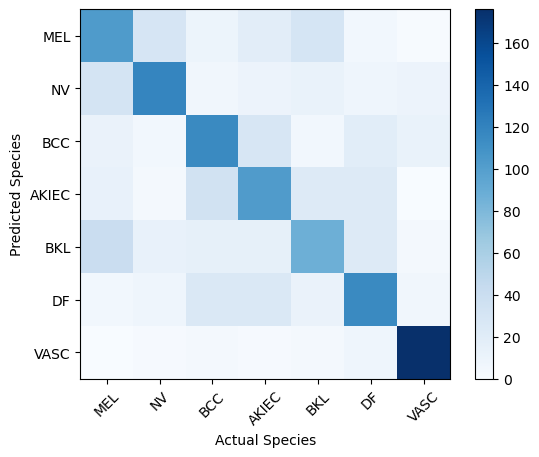

In [55]:
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(lesion_classes))
plt.xticks(tick_marks, lesion_classes, rotation=45)
plt.yticks(tick_marks, lesion_classes)
plt.xlabel("Actual Species")
plt.ylabel("Predicted Species")
plt.show()


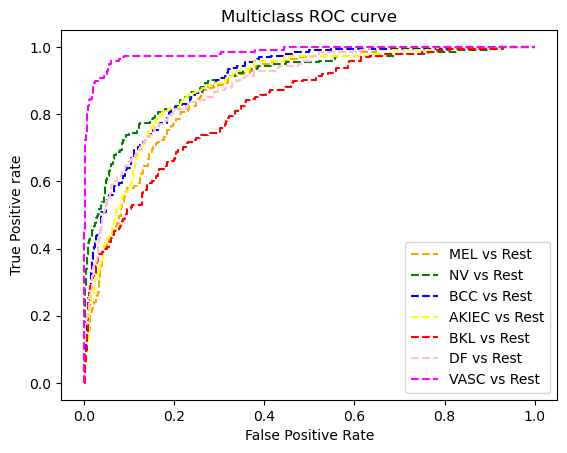

Average AUC: 0.8929438652515576


In [56]:
# Get class probability scores
lesion_prob = multi_model.predict_proba(x_lesion_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(lesion_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_lesion_test, lesion_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=lesion_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=lesion_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=lesion_classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label=lesion_classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='red', label=lesion_classes[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='pink', label=lesion_classes[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='magenta', label=lesion_classes[6] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

auc = roc_auc_score(y_lesion_test, lesion_prob, multi_class='ovr')
print('Average AUC:', auc)
